In [48]:
#Import all necessary Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Preprocessing

dataset source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [49]:
#Import dataset
df_train = pd.read_csv('ds_project3_train.csv')
df_test = pd.read_csv('ds_project3_test.csv')

#Check the train dataset
print(df_train.info())
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [50]:
#Check test dataset
print(df_test.info())
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [51]:
print("List of Data Train Features: " + str(df_train.columns))
print("List of Data Test Features: " + str(df_test.columns))

List of Data Train Features: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
   

In [52]:
#Let's choose only 9 features which SalePrice will be target variable
features = ['LotArea','YearBuilt','OverallQual', 'OverallCond','GrLivArea','MiscFeature','GarageArea',\
                     'KitchenQual', 'SalePrice']
df_train = df_train[features]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LotArea      1460 non-null   int64 
 1   YearBuilt    1460 non-null   int64 
 2   OverallQual  1460 non-null   int64 
 3   OverallCond  1460 non-null   int64 
 4   GrLivArea    1460 non-null   int64 
 5   MiscFeature  54 non-null     object
 6   GarageArea   1460 non-null   int64 
 7   KitchenQual  1460 non-null   object
 8   SalePrice    1460 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 102.8+ KB


In [53]:
#Let's choose the same feature for test dataset except SalePrice
df_test = df_test[features[:-1]] #Since SalePrice column is absent in df_test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotArea      1459 non-null   int64  
 1   YearBuilt    1459 non-null   int64  
 2   OverallQual  1459 non-null   int64  
 3   OverallCond  1459 non-null   int64  
 4   GrLivArea    1459 non-null   int64  
 5   MiscFeature  51 non-null     object 
 6   GarageArea   1458 non-null   float64
 7   KitchenQual  1458 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 91.3+ KB


### Let's Look deeper into train dataset

In [54]:
df_train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [55]:
df_train['MiscFeature'].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [56]:
df_train.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,1515.463699,472.980137,180921.195890
std,9981.264932,30.202904,1.382997,1.112799,525.480383,213.804841,79442.502883
min,1300.000000,1872.000000,1.000000,1.000000,334.000000,0.000000,34900.000000
25%,7553.500000,1954.000000,5.000000,5.000000,1129.500000,334.500000,129975.000000
50%,9478.500000,1973.000000,6.000000,5.000000,1464.000000,480.000000,163000.000000
75%,11601.500000,2000.000000,7.000000,6.000000,1776.750000,576.000000,214000.000000
max,215245.000000,2010.000000,10.000000,9.000000,5642.000000,1418.000000,755000.000000


<Axes: xlabel='SalePrice', ylabel='Count'>

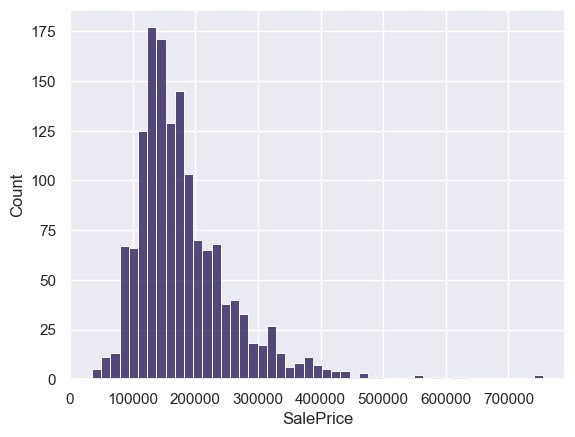

In [57]:
sns.set_theme(palette='magma')
sns.histplot(df_train['SalePrice']) # distribusi kolom SalePrice

In [58]:
# hitung nilai skewness dan kurtosisnya
# skewness: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung miring atau tidak simetris
# Kurtosis: ukuran statistik yang digunakan untuk mengukur sejauh mana distribusi data cenderung 
# memiliki ekor panjang (outliers) dan puncak tajam (peakedness) dibandingkan dengan distribusi normal 
# (distribusi Gauss atau distribusi berbentuk lonceng). 

print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### ScatterPlot GrLivArea terhadap target variable

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

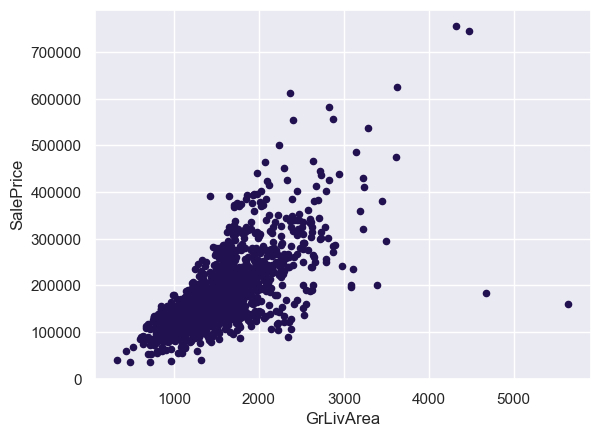

In [59]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')

### BoxPlot antara OverallQual dengan target varible

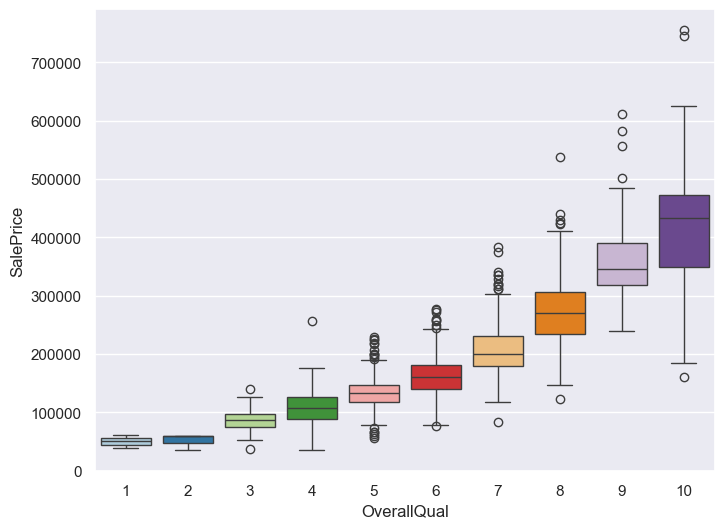

In [60]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette="Paired")

In [61]:
# Terlihat beberapa anomaly diatas Upper Extreme Value (Q1-1.5*IQR) maupun dibawah Lower Extreme Value (Q3-1.5*IQR)
# Seperti pada SalePrice dibawah 200000 dengan OverallQual dengan nilai 10
print("dimana mean SalePrice (pada OverallQual = 10) adalah: " + str(df_train[(df_train['OverallQual']==10)]['SalePrice'].mean()))
df_train[(df_train['OverallQual']==10) & (df_train['SalePrice']<200000)]

dimana mean SalePrice (pada OverallQual = 10) adalah: 438588.3888888889


,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual,SalePrice
523,40094,2007,10,5,4676,NaN,884,Ex,184750
1298,63887,2008,10,5,5642,NaN,1418,Ex,160000


### BoxPlot antara YearBuilt dengan Target Variable

In [62]:
print(df_train['YearBuilt'].min())
print(df_train['YearBuilt'].max())

1872
2010


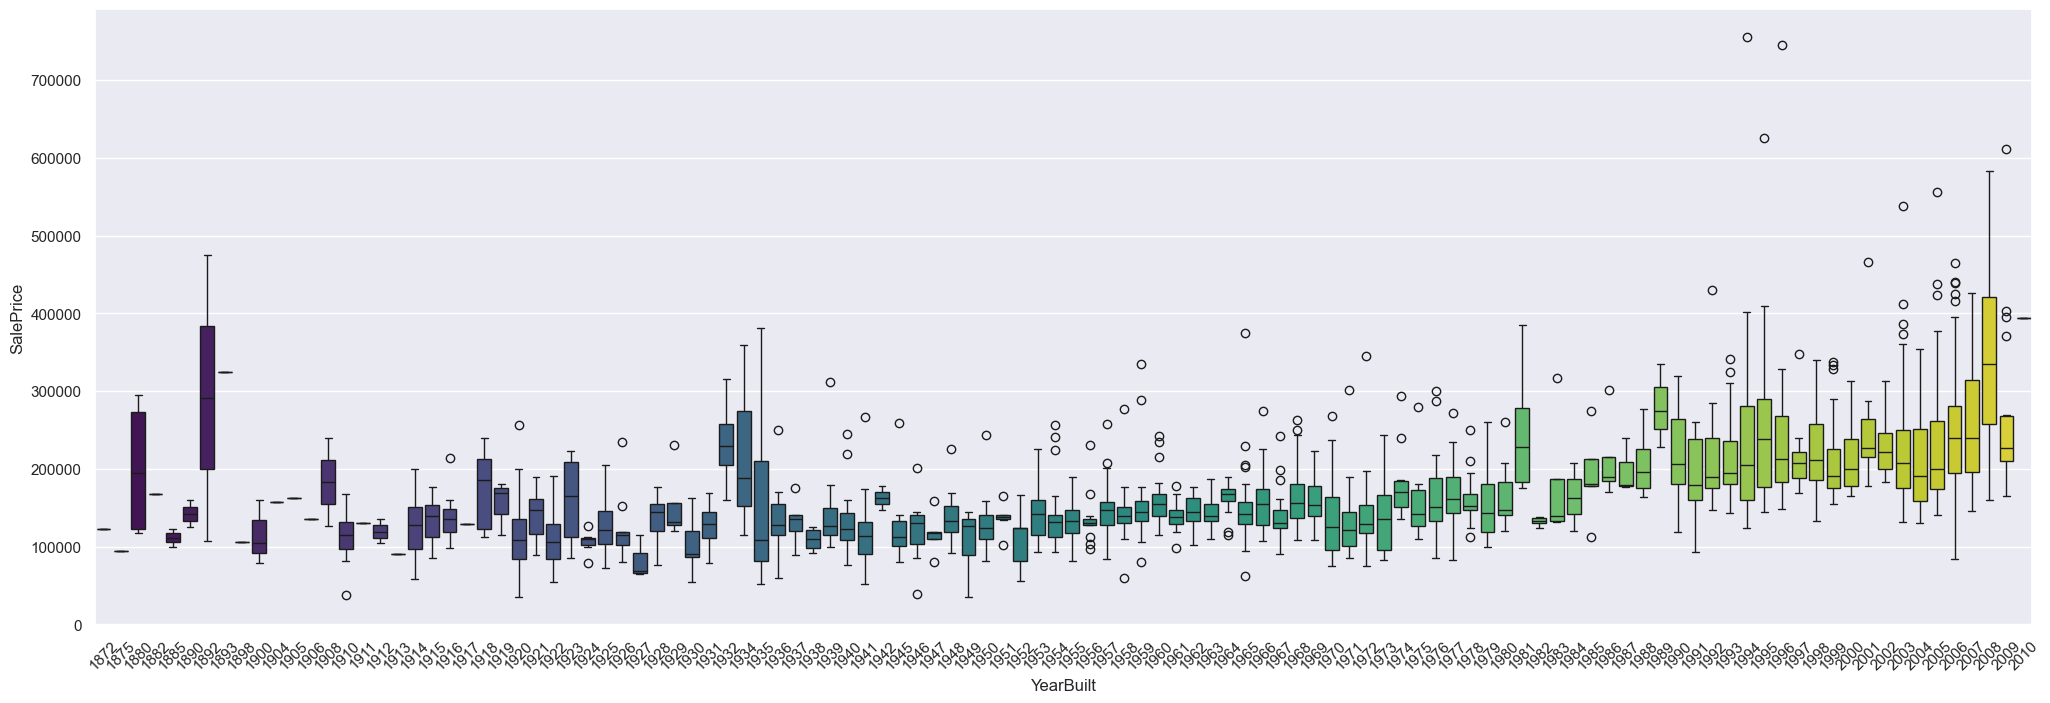

In [63]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data, palette="viridis")
ax.tick_params(axis='x', labelrotation=45)

### Correlation Map  (Correlation Matrix) antar Variable

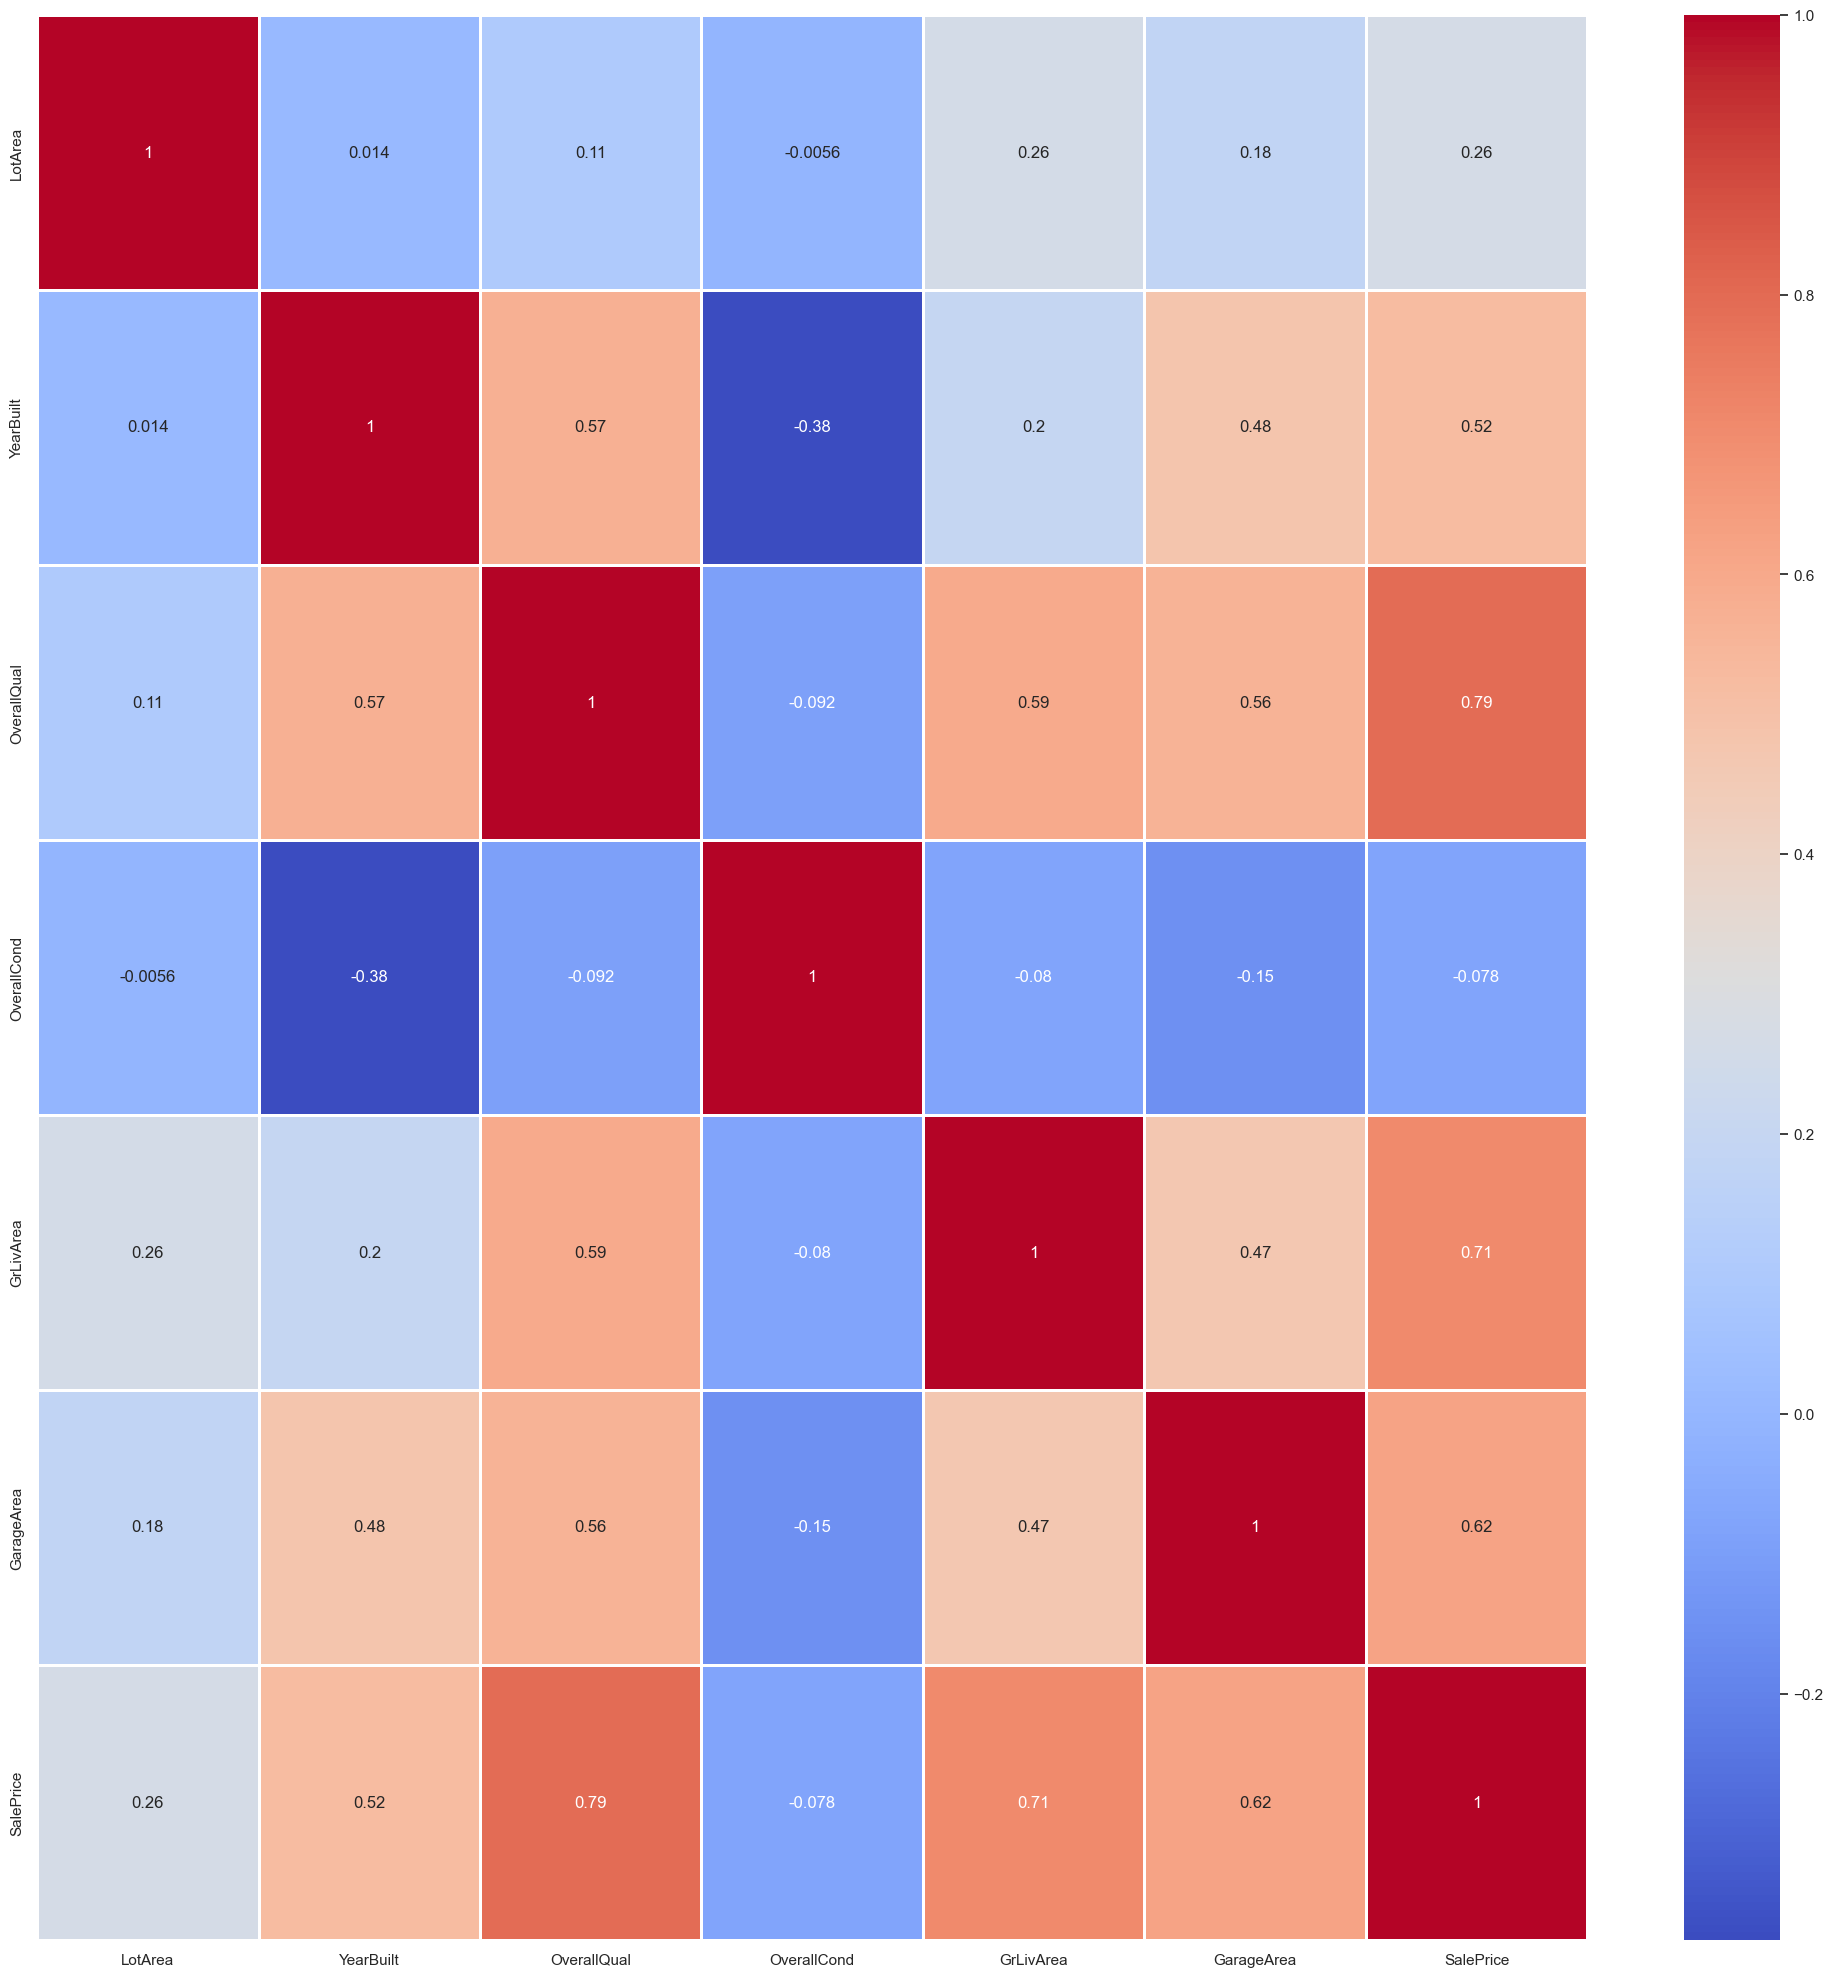

In [64]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train.corr(numeric_only=True), cmap = "coolwarm", annot=True, linewidth=2)

In [65]:
hig_corr = df_train.corr(numeric_only=True)
hig_corr["SalePrice"]

LotArea        0.263843
YearBuilt      0.522897
OverallQual    0.790982
OverallCond   -0.077856
GrLivArea      0.708624
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

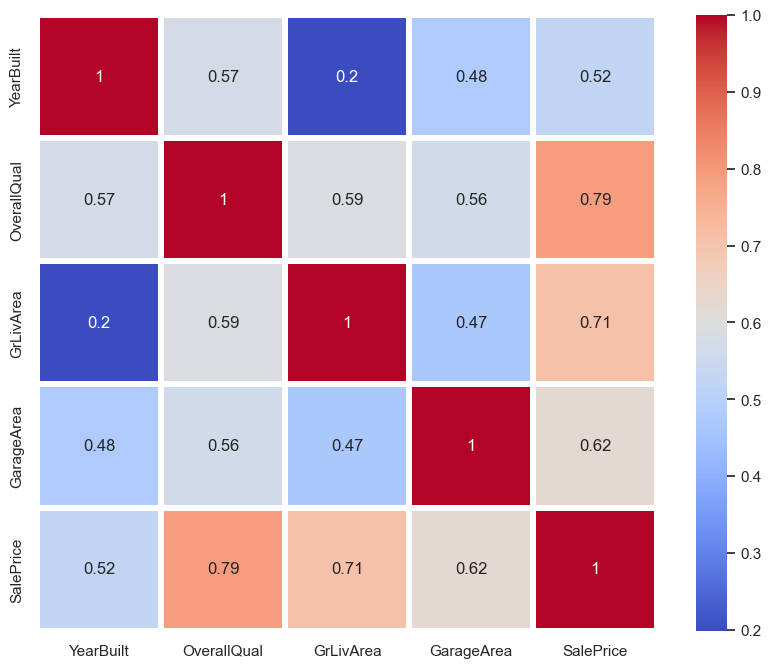

In [66]:
# tampilkan heatmap hanya untuk kolom2 yg nilai korelasinya dengan SalePrice >= 0.5
hig_corr_features = hig_corr.index[abs(hig_corr["SalePrice"]) >= 0.5]

plt.figure(figsize=(10,8))
ax = sns.heatmap(df_train[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)

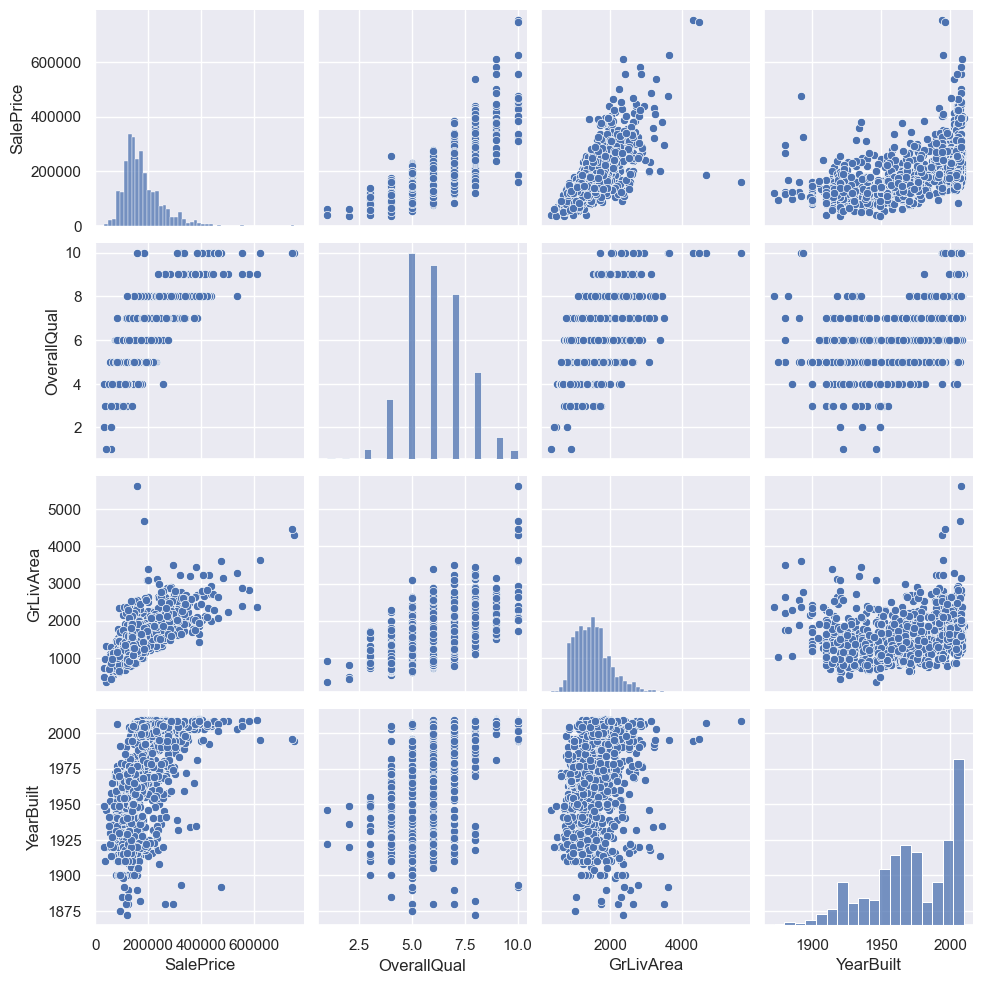

In [67]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

### Distribusi Target Variable

<Axes: xlabel='SalePrice', ylabel='Density'>

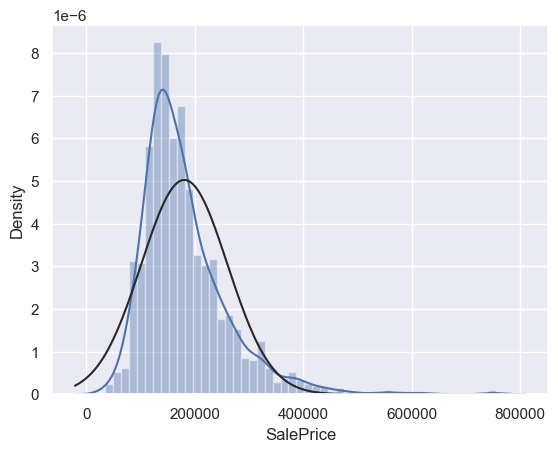

In [68]:
sns.distplot(df_train['SalePrice'], fit = norm)

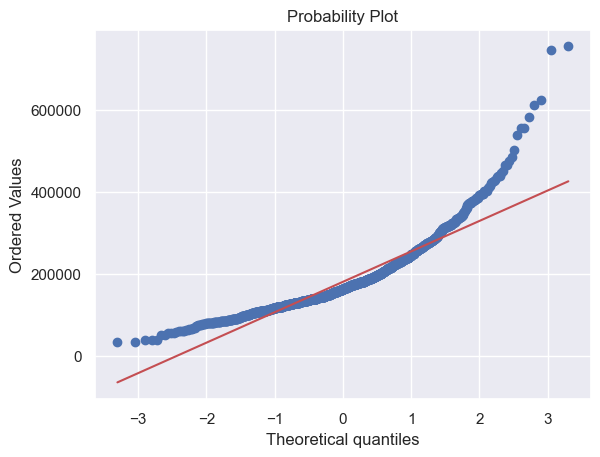

In [69]:
# QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [70]:
y_train = df_train.SalePrice.values
X_train = df_train.drop(columns="SalePrice")
X_test = df_test
X_train.shape, X_test.shape, y_train.shape

((1460, 8), (1459, 8), (1460,))

In [71]:
X_train

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,GarageArea,KitchenQual
0,8450,2003,7,5,1710,NaN,548,Gd
1,9600,1976,6,8,1262,NaN,460,TA
2,11250,2001,7,5,1786,NaN,608,Gd
3,9550,1915,7,5,1717,NaN,642,Gd
4,14260,2000,8,5,2198,NaN,836,Gd
...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,NaN,460,TA
1456,13175,1978,6,6,2073,NaN,500,TA
1457,9042,1941,7,9,2340,Shed,252,Gd
1458,9717,1950,5,6,1078,NaN,240,Gd


# Modeling

In [72]:
# Mari gunakan KFold dan buat function untuk melihat score performa model saat training
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, root_mean_squared_error, f1_score

# fungsi untuk melakukan cross validation
def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    f1 = make_scorer(f1_score)
    mae = make_scorer(mean_absolute_error)
    rmse = make_scorer(root_mean_squared_error)
    
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    mae_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = mae) 
    rmse_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = rmse) 
    score = [r2_val_score.mean(), mae_val_score.mean(), rmse_val_score.mean()]
    return score

## Linear Regression

In [73]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

ValueError: 
All the 4 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_base.py", line 609, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1301, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\new user\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Shed'


In [74]:
X_train_mod = df_train.drop(columns=["MiscFeature", "KitchenQual"])
X_train_mod

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,GarageArea,SalePrice
0,8450,2003,7,5,1710,548,208500
1,9600,1976,6,8,1262,460,181500
2,11250,2001,7,5,1786,608,223500
3,9550,1915,7,5,1717,642,140000
4,14260,2000,8,5,2198,836,250000
...,...,...,...,...,...,...,...
1455,7917,1999,6,5,1647,460,175000
1456,13175,1978,6,6,2073,500,210000
1457,9042,1941,7,9,2340,252,266500
1458,9717,1950,5,6,1078,240,142125


In [75]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR, X_train_mod)

[1.0, 4.954628123302166e-11, 6.885728375604553e-11]

## Lasso Regression

In [76]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso, X_train_mod)

[1.0, 0.0002685134017828865, 0.000390907240011652]

### Support Vector Regression (SVR)

In [77]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg, X_train_mod)

[-0.05039916625924562, 55471.98907314724, 81251.52292329662]

### XGBoost

In [78]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg, X_train_mod)

[0.9945640712976456, 1287.5909193065067, 5601.465169988808]

# Periksa Distribusi Residual (Error)

<Axes: ylabel='Density'>

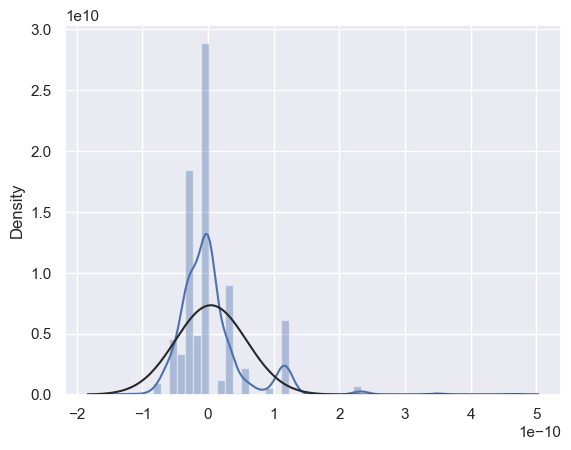

In [87]:
# bangun model LinReg untuk memprediksi harga rumah dari data training
model = LR.fit(X_train_mod, y_train) 
y_train_pred = model.predict(X_train_mod)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

<Axes: ylabel='Density'>

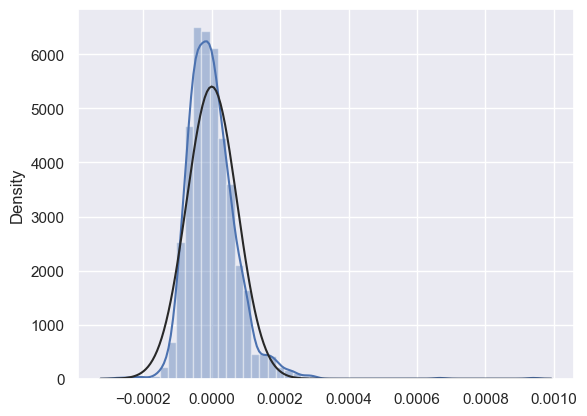

In [88]:
# bangun model Lasso untuk memprediksi harga rumah dari data training
model = lasso.fit(X_train_mod, y_train) 
y_train_pred = model.predict(X_train_mod)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

<Axes: ylabel='Density'>

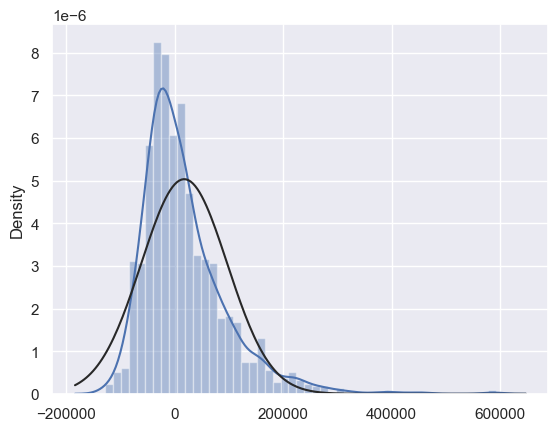

In [89]:
# bangun model SVR untuk memprediksi harga rumah dari data training
model = svr_reg.fit(X_train_mod, y_train) 
y_train_pred = model.predict(X_train_mod)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

<Axes: ylabel='Density'>

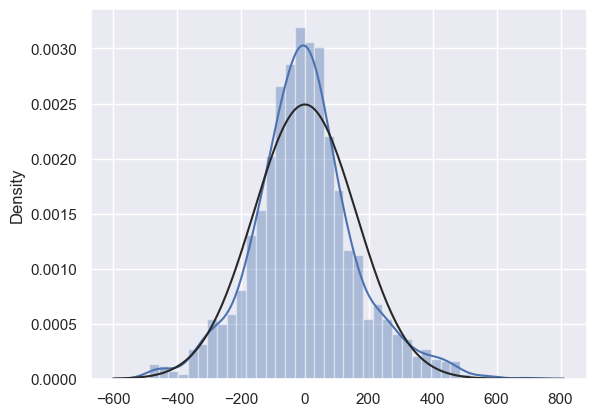

In [90]:
# bangun model XGBoost untuk memprediksi harga rumah dari data training
model = xgb_reg.fit(X_train_mod, y_train) 
y_train_pred = model.predict(X_train_mod)
residuals = y_train - y_train_pred
sns.distplot(residuals , fit=norm)

# Lakukan instruksi berikut dan jawablah pertanyannya.

- [INSTRUKSI] Ulangi jalankan notebook dari awal mulai dari import dataset sampai akhir tahap 'Periksa Distribusi Residual' (menampilkan visualisasi distribusinya), TETAPI lakukan beberapa perubahan untuk MENGHAPUS semua cell yang berfungsi untuk melakukan transformasi kolom, baik kolom fitur maupun target (artinya biarkan distribusi kolom sesuai data original apa adanya).

- [PERTANYAAN] Apakah distribusi residualnya masih normal? Menurut Anda, apa kesimpulan eksperimen kedua regresi linear ini?

# **[Jawaban]** Pada dasarnya bila feature transformation tidak dilakukan maka:
- ### Akan terjadi Error karena data kategorikal masih dalam bentuk string(object) yang tidak dapat diolah oleh regresi linear.
- ### Apabila kita drop data kategorikal dan train kembali dataset terebut. Pada distribusi residualnya terlihat sangat berbeda  dengan hasil dari model yang telah dilakukan preprocessing.
- ### Perbedaan mendasarnya antara lain:
> #### 1 Pertama, karena tidak adanya scaling untuk normalization/standarization maka metric error dan distribusi residual tiap model akan tidak bisa dibandingkan (tidak apple-to-apple)
> #### 2 Kedua, Nilai error/residualnya lebih cenderung banyak error yang terlihat jelas dari distribusi residualnya (garis biru dan hitam yang banyak tidak beririsan dan juga density di nilai selain titik nol makin tinggi.)

## **[Kesimpulan]** Data Preprocessing >> Missing Value Handling, Skewness Treatmeant, Label Encoding, dan Scaling sangat-sangat berpengaruh dalam pembuatan model machine learning.